# Setup

In [1]:
import pandas as pd
from helpers import *

from os import listdir

In [2]:
%matplotlib inline

In [3]:
pd.options.mode.chained_assignment = None

# Read in data

In [4]:
pwd

'/Users/mzhang13/Code/njtransit/notebooks/analysis'

In [5]:
listdir("../../csv/")

['2018_03_04.csv',
 '2018_03_03.csv',
 '.DS_Store',
 '2018_03_02.csv',
 '2018_03_01.csv',
 '2018_02_26.csv',
 '2018_02_27.csv',
 'cleaned',
 '2018_02_25.csv',
 '2018_02_19.csv',
 '2018_02_18.csv',
 '2018_02_24.csv',
 '2018_02_08.csv',
 '2018_02_20.csv',
 '2018_02_21.csv',
 '2018_02_09.csv',
 '2018_02_23.csv',
 '2018_02_22.csv',
 '2018_02_07.csv',
 '2018_02_13.csv',
 '2018_02_12.csv',
 '2018_02_06.csv',
 '2018_02_10.csv',
 '2018_02_05.csv',
 '2018_02_11.csv',
 '2018_02_15.csv',
 '2018_02_14.csv',
 '2018_02_28.csv',
 '2018_02_16.csv',
 '2018_02_17.csv']

In [6]:
files_to_read = sorted(listdir("../../csv/"))
files_to_read = [file for file in files_to_read if ".csv" in file]

In [7]:
len(files_to_read)

28

In [8]:
df = pd.DataFrame()

for file in files_to_read:
    temp = pd.read_csv("../../csv/"+file)
    df = pd.concat([df, temp])

## Check

In [9]:
df.head()

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type
0,0337,2018-02-05,1.0,Hoboken,63.0,Hoboken,63.0,2018-02-05 17:39:00,2018-02-05 17:38:02,Departed,Morristown Line,NJ Transit
1,0337,2018-02-05,2.0,Hoboken,63.0,Newark Broad Street,106.0,2018-02-05 17:55:00,2018-02-05 17:58:03,Departed,Morristown Line,NJ Transit
2,0337,2018-02-05,3.0,Newark Broad Street,106.0,East Orange,37.0,2018-02-05 18:00:00,2018-02-05 18:03:07,Departed,Morristown Line,NJ Transit
3,0337,2018-02-05,4.0,East Orange,37.0,Brick Church,23.0,2018-02-05 18:03:00,2018-02-05 18:06:12,Departed,Morristown Line,NJ Transit
4,0337,2018-02-05,5.0,Brick Church,23.0,Orange,112.0,2018-02-05 18:06:00,2018-02-05 18:09:09,Departed,Morristown Line,NJ Transit


In [10]:
for col in ["date", "expected", "time"]:
    df[col] = pd.to_datetime(df[col])

In [11]:
df.tail()

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type
5461,1837,2018-03-04,9.0,Paterson,116.0,Hawthorne,58.0,2018-03-04 22:53:00,2018-03-04 22:57:02,Departed,Main Line,NJ Transit
5462,1837,2018-03-04,10.0,Hawthorne,58.0,Glen Rock Main Line,52.0,2018-03-04 22:57:00,2018-03-04 23:01:08,Departed,Main Line,NJ Transit
5463,1837,2018-03-04,11.0,Glen Rock Main Line,52.0,Ridgewood,131.0,2018-03-04 23:01:00,2018-03-04 23:04:08,Departed,Main Line,NJ Transit
5464,1837,2018-03-04,12.0,Ridgewood,131.0,Ho-Ho-Kus,64.0,2018-03-04 23:05:00,2018-03-04 23:08:01,Departed,Main Line,NJ Transit
5465,1837,2018-03-04,13.0,Ho-Ho-Kus,64.0,Waldwick,151.0,2018-03-04 23:09:00,2018-03-04 23:10:00,Departed,Main Line,NJ Transit


# Clean data

In [12]:
%%time

df = format_df(df)

CPU times: user 36.2 s, sys: 754 ms, total: 37 s
Wall time: 37.4 s


In [13]:
df.head()

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
0,0337,2018-02-05,1.0,Hoboken,63.0,Hoboken,63.0,2018-02-05 17:39:00,2018-02-05 17:38:02,Departed,Morristown Line,NJ Transit,0.000000
1,0337,2018-02-05,2.0,Hoboken,63.0,Newark Broad Street,106.0,2018-02-05 17:55:00,2018-02-05 17:58:03,Departed,Morristown Line,NJ Transit,3.050000
2,0337,2018-02-05,3.0,Newark Broad Street,106.0,East Orange,37.0,2018-02-05 18:00:00,2018-02-05 18:03:07,Departed,Morristown Line,NJ Transit,3.116667
3,0337,2018-02-05,4.0,East Orange,37.0,Brick Church,23.0,2018-02-05 18:03:00,2018-02-05 18:06:12,Departed,Morristown Line,NJ Transit,3.200000
4,0337,2018-02-05,5.0,Brick Church,23.0,Orange,112.0,2018-02-05 18:06:00,2018-02-05 18:09:09,Departed,Morristown Line,NJ Transit,3.150000


In [14]:
df.tail()

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
5461,1837,2018-03-04,9.0,Paterson,116.0,Hawthorne,58.0,2018-03-04 22:53:00,2018-03-04 22:57:02,Departed,Main Line,NJ Transit,4.033333
5462,1837,2018-03-04,10.0,Hawthorne,58.0,Glen Rock Main Line,52.0,2018-03-04 22:57:00,2018-03-04 23:01:08,Departed,Main Line,NJ Transit,4.133333
5463,1837,2018-03-04,11.0,Glen Rock Main Line,52.0,Ridgewood,131.0,2018-03-04 23:01:00,2018-03-04 23:04:08,Departed,Main Line,NJ Transit,3.133333
5464,1837,2018-03-04,12.0,Ridgewood,131.0,Ho-Ho-Kus,64.0,2018-03-04 23:05:00,2018-03-04 23:08:01,Departed,Main Line,NJ Transit,3.016667
5465,1837,2018-03-04,13.0,Ho-Ho-Kus,64.0,Waldwick,151.0,2018-03-04 23:09:00,2018-03-04 23:10:00,Departed,Main Line,NJ Transit,1.000000


In [35]:
# df.to_csv("../../csv/cleaned/formatted_20180205-20180304.csv")

Delay in unit of minutes

## Read in cleaned data

In [16]:
# df = pd.read_csv("../../csv/cleaned/formatted_20180205-20180304.csv")

# Filter data

In [17]:
df["type"].value_counts()

NJ Transit    228217
Amtrak         11584
Name: type, dtype: int64

In [18]:
df["line"].value_counts()

Northeast Corrdr             35582
No Jersey Coast              34954
Morristown Line              34528
Gladstone Branch             22192
Main Line                    20968
Bergen Co. Line              19380
Raritan Valley               18775
Montclair-Boonton            18155
Pascack Valley               13937
Atl. City Line                5714
Princeton Shuttle             4032
Amtrak                        3461
REGIONAL                      3178
ACELA EXPRESS                 1945
KEYSTONE                      1584
AMTRAK                         284
PENNSYLVANIAN                  223
CRESCENT                       211
SILVER STAR  -R                207
CAROLINIAN                     188
SILVER METEOR-R                179
VERMONTER    -R                 76
AMTRAK REGIONAL                 24
Palmetto                        16
Silver Service / Palmetto        4
Carolinian / Piedmont            4
Name: line, dtype: int64

Simple enough...

In [19]:
df[df["from"].str.lower().str.contains("princeton")]["from"].unique()

array(['Princeton Junction', 'Princeton'], dtype=object)

In [20]:
df[df["to"].str.lower().str.contains("princeton")]["to"].unique()

array(['Princeton Junction', 'Princeton'], dtype=object)

## Princeton only

In [21]:
princeton = df[(df["from"].str.lower().str.contains("princeton")) | (df["to"].str.lower().str.contains("princeton"))]

In [22]:
len(princeton)

9197

In [23]:
princeton.head()

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
15,4135,2018-02-05,1.0,Princeton Junction,125.0,Princeton Junction,125.0,2018-02-05 12:04:00,2018-02-05 12:04:08,Departed,Princeton Shuttle,NJ Transit,0.133333
16,4135,2018-02-05,2.0,Princeton Junction,125.0,Princeton,124.0,2018-02-05 12:09:00,2018-02-05 12:09:00,Departed,Princeton Shuttle,NJ Transit,0.000000
112,4132,2018-02-05,1.0,Princeton,124.0,Princeton,124.0,2018-02-05 11:17:00,2018-02-05 11:17:10,Departed,Princeton Shuttle,NJ Transit,0.166667
113,4132,2018-02-05,2.0,Princeton,124.0,Princeton Junction,125.0,2018-02-05 11:22:00,2018-02-05 11:22:00,Departed,Princeton Shuttle,NJ Transit,0.000000
116,3926,2018-02-05,3.0,Hamilton,32905.0,Princeton Junction,125.0,2018-02-05 07:45:00,2018-02-05 07:45:15,Departed,Northeast Corrdr,NJ Transit,0.250000


In [24]:
princeton["type"].value_counts()

NJ Transit    8933
Amtrak         264
Name: type, dtype: int64

In [25]:
princeton = princeton[princeton["type"] == "NJ Transit"]

# Explore Princeton

## Date

In [26]:
princeton.groupby(princeton["date"]).size()

date
2018-02-05    362
2018-02-06    350
2018-02-07    364
2018-02-08    350
2018-02-09    372
2018-02-10    238
2018-02-11    224
2018-02-12    364
2018-02-13    348
2018-02-14    366
2018-02-15    350
2018-02-16    372
2018-02-17    238
2018-02-18    226
2018-02-19    258
2018-02-20    364
2018-02-21    348
2018-02-22    366
2018-02-23    350
2018-02-24    238
2018-02-25    224
2018-02-26    364
2018-02-27    348
2018-02-28    366
2018-03-01    348
2018-03-02    371
2018-03-03    238
2018-03-04    226
dtype: int64

In [27]:
princeton.groupby(princeton["date"].dt.weekday).size()

date
0    1348
1    1410
2    1444
3    1414
4    1465
5     952
6     900
dtype: int64

Weekends low, as expected

## Check delays

In [28]:
princeton["delay"].describe()

count    8933.000000
mean        2.207278
std         5.274259
min         0.000000
25%         0.000000
50%         0.166667
75%         2.216667
max        85.000000
Name: delay, dtype: float64

In [29]:
princeton["delay"].sort_values(ascending = False).head()

9434    85.0
9433    84.0
8447    78.0
8448    76.0
3950    73.0
Name: delay, dtype: float64

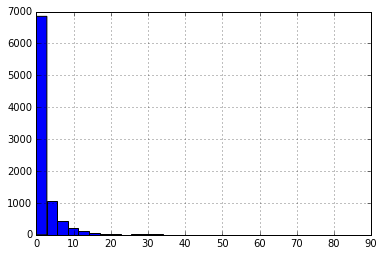

In [30]:
princeton["delay"].hist(bins = 30)

In [31]:
princeton[pd.isnull(princeton["delay"])]

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay


# Dinky only

In [32]:
princeton["line"].value_counts()

Northeast Corrdr     4901
Princeton Shuttle    4032
Name: line, dtype: int64

In [33]:
dinky = princeton[princeton["line"] == "Princeton Shuttle"]

In [34]:
dinky.head(20)

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
15,4135,2018-02-05,1.0,Princeton Junction,125.0,Princeton Junction,125.0,2018-02-05 12:04:00,2018-02-05 12:04:08,Departed,Princeton Shuttle,NJ Transit,0.133333
16,4135,2018-02-05,2.0,Princeton Junction,125.0,Princeton,124.0,2018-02-05 12:09:00,2018-02-05 12:09:00,Departed,Princeton Shuttle,NJ Transit,0.000000
112,4132,2018-02-05,1.0,Princeton,124.0,Princeton,124.0,2018-02-05 11:17:00,2018-02-05 11:17:10,Departed,Princeton Shuttle,NJ Transit,0.166667
113,4132,2018-02-05,2.0,Princeton,124.0,Princeton Junction,125.0,2018-02-05 11:22:00,2018-02-05 11:22:00,Departed,Princeton Shuttle,NJ Transit,0.000000
131,4104,2018-02-05,1.0,Princeton,124.0,Princeton,124.0,2018-02-06 01:45:00,2018-02-06 01:45:05,Departed,Princeton Shuttle,NJ Transit,0.083333
132,4104,2018-02-05,2.0,Princeton,124.0,Princeton Junction,125.0,2018-02-06 01:50:00,2018-02-06 01:50:00,Departed,Princeton Shuttle,NJ Transit,0.000000
245,4103,2018-02-05,1.0,Princeton Junction,125.0,Princeton Junction,125.0,2018-02-06 01:35:00,2018-02-06 01:35:02,Departed,Princeton Shuttle,NJ Transit,0.033333
246,4103,2018-02-05,2.0,Princeton Junction,125.0,Princeton,124.0,2018-02-06 01:40:00,2018-02-06 01:40:00,Departed,Princeton Shuttle,NJ Transit,0.000000
314,4168,2018-02-05,1.0,Princeton,124.0,Princeton,124.0,2018-02-05 19:37:00,2018-02-05 19:37:10,Departed,Princeton Shuttle,NJ Transit,0.166667
315,4168,2018-02-05,2.0,Princeton,124.0,Princeton Junction,125.0,2018-02-05 19:42:00,2018-02-05 19:42:00,Departed,Princeton Shuttle,NJ Transit,0.000000


Always stop_sequence 1-2-1-2-1-2...

In [36]:
dinky.groupby(dinky["expected"].dt.weekday).size()

expected
0    564
1    652
2    620
3    644
4    620
5    468
6    464
dtype: int64

## Delay

In [37]:
dinky["delay"].describe()

count    4032.000000
mean        0.083309
std         0.134500
min         0.000000
25%         0.000000
50%         0.000000
75%         0.150000
max         4.466667
Name: delay, dtype: float64

In [38]:
dinky["delay"].sort_values(ascending = False).head(20)

4099    4.466667
7301    3.233333
8715    1.000000
2875    0.566667
2609    0.533333
5689    0.500000
6836    0.483333
7085    0.483333
400     0.466667
1841    0.466667
9914    0.466667
8198    0.466667
5416    0.466667
1923    0.466667
2674    0.450000
3567    0.450000
2675    0.450000
7962    0.433333
9229    0.433333
8849    0.416667
Name: delay, dtype: float64

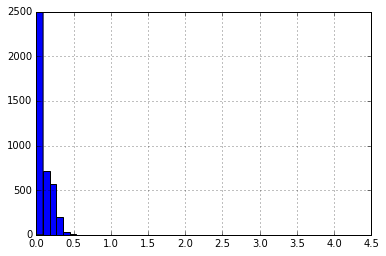

In [39]:
dinky["delay"].hist(bins = 50)

## Stop sequence 1

In [40]:
leaving_dinky = dinky[dinky["stop_sequence"] == 1.0]

In [41]:
leaving_dinky["status"].value_counts()

Departed    2016
Name: status, dtype: int64

In [42]:
leaving_dinky.head()

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
15,4135,2018-02-05,1.0,Princeton Junction,125.0,Princeton Junction,125.0,2018-02-05 12:04:00,2018-02-05 12:04:08,Departed,Princeton Shuttle,NJ Transit,0.133333
112,4132,2018-02-05,1.0,Princeton,124.0,Princeton,124.0,2018-02-05 11:17:00,2018-02-05 11:17:10,Departed,Princeton Shuttle,NJ Transit,0.166667
131,4104,2018-02-05,1.0,Princeton,124.0,Princeton,124.0,2018-02-06 01:45:00,2018-02-06 01:45:05,Departed,Princeton Shuttle,NJ Transit,0.083333
245,4103,2018-02-05,1.0,Princeton Junction,125.0,Princeton Junction,125.0,2018-02-06 01:35:00,2018-02-06 01:35:02,Departed,Princeton Shuttle,NJ Transit,0.033333
314,4168,2018-02-05,1.0,Princeton,124.0,Princeton,124.0,2018-02-05 19:37:00,2018-02-05 19:37:10,Departed,Princeton Shuttle,NJ Transit,0.166667


In [43]:
leaving_dinky["delay"].describe()

count    2016.000000
mean        0.166617
std         0.149338
min         0.000000
25%         0.100000
50%         0.150000
75%         0.216667
max         4.466667
Name: delay, dtype: float64

In [44]:
leaving_dinky["delay"].quantile(.9)

0.2833333333333333

In [45]:
leaving_dinky["delay"].quantile(.95)

0.31666666666666665

In [46]:
leaving_dinky["delay"].quantile(.999)

0.9935000000000554

In [47]:
leaving_dinky[leaving_dinky["delay"] >= 1]

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
8715,4142,2018-02-20,1.0,Princeton,124.0,Princeton,124.0,2018-02-20 13:46:00,2018-02-20 13:47:00,Departed,Princeton Shuttle,NJ Transit,1.000000
7301,4134,2018-03-01,1.0,Princeton,124.0,Princeton,124.0,2018-03-01 11:52:00,2018-03-01 11:55:14,Departed,Princeton Shuttle,NJ Transit,3.233333
4099,4265,2018-03-04,1.0,Princeton Junction,125.0,Princeton Junction,125.0,2018-03-04 20:34:00,2018-03-04 20:38:28,Departed,Princeton Shuttle,NJ Transit,4.466667


In [48]:
dinky[(dinky["train_id"] == "4265") & (dinky["date"] == "2018-03-04")]

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
4099,4265,2018-03-04,1.0,Princeton Junction,125.0,Princeton Junction,125.0,2018-03-04 20:34:00,2018-03-04 20:38:28,Departed,Princeton Shuttle,NJ Transit,4.466667
4100,4265,2018-03-04,2.0,Princeton Junction,125.0,Princeton,124.0,2018-03-04 20:39:00,2018-03-04 20:39:00,Departed,Princeton Shuttle,NJ Transit,0.000000


So... going to base dinky lateness off of arrival lateness.

## Stop sequence 2

In [49]:
moving_dinky = dinky[dinky["stop_sequence"] != 1.0]

In [50]:
moving_dinky.head()

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
16,4135,2018-02-05,2.0,Princeton Junction,125.0,Princeton,124.0,2018-02-05 12:09:00,2018-02-05 12:09:00,Departed,Princeton Shuttle,NJ Transit,0.0
113,4132,2018-02-05,2.0,Princeton,124.0,Princeton Junction,125.0,2018-02-05 11:22:00,2018-02-05 11:22:00,Departed,Princeton Shuttle,NJ Transit,0.0
132,4104,2018-02-05,2.0,Princeton,124.0,Princeton Junction,125.0,2018-02-06 01:50:00,2018-02-06 01:50:00,Departed,Princeton Shuttle,NJ Transit,0.0
246,4103,2018-02-05,2.0,Princeton Junction,125.0,Princeton,124.0,2018-02-06 01:40:00,2018-02-06 01:40:00,Departed,Princeton Shuttle,NJ Transit,0.0
315,4168,2018-02-05,2.0,Princeton,124.0,Princeton Junction,125.0,2018-02-05 19:42:00,2018-02-05 19:42:00,Departed,Princeton Shuttle,NJ Transit,0.0


In [51]:
len(moving_dinky)

2016

In [52]:
moving_dinky["delay"].describe()

count    2016.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: delay, dtype: float64

In [53]:
len(moving_dinky[moving_dinky["delay"] > 0])

0

In [54]:
# nice
len(moving_dinky[moving_dinky["delay"] > 0]) / len(moving_dinky)

0.0

# Impactful delays

Two main questions:
* Is the Dinky ever delayed such that one misses an outbound train at Princeton Junction?
* How often does a inbound train get delayed such that one misses the Dinky?

In [55]:
# if I go down the df sorted by time, and I get consecutive to/from's of Princeton Junction...

In [56]:
princeton = princeton.sort_values("expected")

## How many dinkys?

In [57]:
dinky["train_id"].nunique()

140

In [58]:
dinky.groupby("stop_sequence").size()

stop_sequence
1.0    2016
2.0    2016
dtype: int64

## Pairing inbound trains to Princeton Junction with the Dinky

x => Princeton Junction => Princeton

Would have missed due to expected vs. would have missed due to actual

### Try "list" method

Hard/annoying to do (if possible) with pandas and shift()

In [59]:
princeton.head()

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
1442,3808,2018-02-05,3.0,Hamilton,32905.0,Princeton Junction,125.0,2018-02-05 04:35:00,2018-02-05 04:36:04,Departed,Northeast Corrdr,NJ Transit,1.066667
824,4105,2018-02-05,1.0,Princeton Junction,125.0,Princeton Junction,125.0,2018-02-05 04:46:00,2018-02-05 04:46:04,Departed,Princeton Shuttle,NJ Transit,0.066667
1443,3808,2018-02-05,4.0,Princeton Junction,125.0,New Brunswick,103.0,2018-02-05 04:49:00,2018-02-05 04:51:02,Departed,Northeast Corrdr,NJ Transit,2.033333
825,4105,2018-02-05,2.0,Princeton Junction,125.0,Princeton,124.0,2018-02-05 04:51:00,2018-02-05 04:51:00,Departed,Princeton Shuttle,NJ Transit,0.000000
6077,4106,2018-02-05,1.0,Princeton,124.0,Princeton,124.0,2018-02-05 04:58:00,2018-02-05 04:58:10,Departed,Princeton Shuttle,NJ Transit,0.166667


In [60]:
princeton_tuples = []

for row in princeton.itertuples():
    princeton_tuples.append(row)

In [61]:
princeton_tuples[0]

Pandas(Index=1442, train_id='3808', date=Timestamp('2018-02-05 00:00:00'), stop_sequence=3.0, _4='Hamilton', from_id=32905.0, to='Princeton Junction', to_id=125.0, expected=Timestamp('2018-02-05 04:35:00'), time=Timestamp('2018-02-05 04:36:04'), status='Departed', line='Northeast Corrdr', type='NJ Transit', delay=1.0666666666666667)

"from" became "_4" (from is a function call?)

In [62]:
# does this method even work?

test_counter = 0

for i in range(len(princeton_tuples)):
    if (princeton_tuples[i].to == "Princeton Junction") & (princeton_tuples[i].line == "Northeast Corrdr"):
        test_counter += 1

test_counter

2452

For each train on Northeast Corridor going into Princeton Junction, find next Dinky leave time (stop_sequence == 1.0)

In [63]:
%%time

relevant_dinky = []

for i in range(len(princeton_tuples)):
    # if goes to Junction from Northeast Coordr
    if (princeton_tuples[i].to == "Princeton Junction") & (princeton_tuples[i].line == "Northeast Corrdr"):
        # find next dinky
        found = False
        j = i + 1
        while not found:
            # if no more Dinkys left
            if j == len(princeton_tuples):
                relevant_dinky.append((None, None, None))
                break
            
            possible = princeton_tuples[j]
            
            # needs to be stop sequence 1.0 (i.e. to/from == "Princeton Junction"), and "Princeton Shuttle"
            if (possible._4 == "Princeton Junction") & (possible.to == "Princeton Junction"):
                relevant_dinky.append((possible.expected, possible.time, possible.delay))
                found = True
            else:
                j += 1
    else:
        relevant_dinky.append((None, None, None))

CPU times: user 16.4 ms, sys: 1.04 ms, total: 17.4 ms
Wall time: 16.5 ms


In [64]:
relevant_dinky_df = pd.DataFrame(relevant_dinky)

Worth transferring index to be able to join later?

In [65]:
inbound_dinky = princeton.reset_index(drop=True).join(relevant_dinky_df).rename(columns={0:"dinky_expected", 1:"dinky_time", 2:"dinky_delay"})

In [66]:
inbound_dinky.head()

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay,dinky_expected,dinky_time,dinky_delay
0,3808,2018-02-05,3.0,Hamilton,32905.0,Princeton Junction,125.0,2018-02-05 04:35:00,2018-02-05 04:36:04,Departed,Northeast Corrdr,NJ Transit,1.066667,2018-02-05 04:46:00,2018-02-05 04:46:04,0.066667
1,4105,2018-02-05,1.0,Princeton Junction,125.0,Princeton Junction,125.0,2018-02-05 04:46:00,2018-02-05 04:46:04,Departed,Princeton Shuttle,NJ Transit,0.066667,NaT,NaT,NaN
2,3808,2018-02-05,4.0,Princeton Junction,125.0,New Brunswick,103.0,2018-02-05 04:49:00,2018-02-05 04:51:02,Departed,Northeast Corrdr,NJ Transit,2.033333,NaT,NaT,NaN
3,4105,2018-02-05,2.0,Princeton Junction,125.0,Princeton,124.0,2018-02-05 04:51:00,2018-02-05 04:51:00,Departed,Princeton Shuttle,NJ Transit,0.000000,NaT,NaT,NaN
4,4106,2018-02-05,1.0,Princeton,124.0,Princeton,124.0,2018-02-05 04:58:00,2018-02-05 04:58:10,Departed,Princeton Shuttle,NJ Transit,0.166667,NaT,NaT,NaN


In [67]:
inbound_dinky = inbound_dinky[pd.notnull(inbound_dinky["dinky_expected"])]

In [68]:
# good
len(inbound_dinky[pd.notnull(inbound_dinky["dinky_expected"])])

2450

In [69]:
inbound_dinky["from"].value_counts()

Hamilton                 1150
Jersey Avenue             585
New Brunswick             521
Newark Penn Station       121
Trenton                    61
New York Penn Station       6
Secaucus Upper Lvl          2
Linden                      1
Elizabeth                   1
Metuchen                    1
Metropark                   1
Name: from, dtype: int64

### Create north vs. southbound

In [76]:
from_trenton_stations = ["Hamilton", "Trenton"]

In [77]:
inbound_dinky["from_trenton"] = inbound_dinky["from"].isin(from_trenton_stations)

In [152]:
inbound_dinky_from_south = inbound_dinky[inbound_dinky["from_trenton"]]

In [153]:
inbound_dinky_from_north = inbound_dinky[~inbound_dinky["from_trenton"]]

### High-level lateness

In [78]:
len(inbound_dinky), len(inbound_dinky[inbound_dinky["delay"] >= 3])

(2450, 1080)

In [79]:
inbound_dinky["late_to_junction"] = inbound_dinky["delay"] >= 3

In [80]:
inbound_dinky.groupby("from_trenton").size()

from_trenton
False    1239
True     1211
dtype: int64

In [81]:
inbound_dinky.groupby("from_trenton")["late_to_junction"].sum() / inbound_dinky.groupby("from_trenton").size()

from_trenton
False    0.347054
True     0.536746
dtype: float64

In [83]:
hamilton = df[(df["from"] == "Trenton") & (df["to"] == "Hamilton")]

In [84]:
len(hamilton), len(hamilton[hamilton["delay"] >= 3])

(1142, 641)

In [85]:
trenton = df[(df["from"] == "Trenton") & (df["to"] == "Trenton")]

In [86]:
len(trenton), len(trenton[trenton["delay"] >= 3])

(1190, 495)

### Wait time for dinky (scheduled & actual)

In [87]:
inbound_dinky["scheduled_wait_time"] = inbound_dinky["dinky_expected"] - inbound_dinky["expected"]

In [88]:
inbound_dinky["scheduled_wait_time"] = inbound_dinky["scheduled_wait_time"].apply(lambda x: x.total_seconds() / 60)

In [89]:
inbound_dinky["actual_wait_time"] = inbound_dinky["dinky_time"] - inbound_dinky["time"]

In [90]:
inbound_dinky["actual_wait_time"] = inbound_dinky["actual_wait_time"].apply(lambda x: x.total_seconds() / 60)

### Late to dinky

In [91]:
inbound_dinky["late"] = inbound_dinky["actual_wait_time"] < 0

In [92]:
sum(inbound_dinky["late"])

363

In [93]:
sum(inbound_dinky["late"]) / len(inbound_dinky)

0.14816326530612245

In [94]:
inbound_dinky.groupby("from_trenton")["late"].sum() / inbound_dinky.groupby("from_trenton").size()

from_trenton
False    0.116223
True     0.180842
dtype: float64

In [95]:
sum(inbound_dinky["late"]) / len(inbound_dinky)

0.14816326530612245

#### Next dinky wait time?

In [96]:
leaves_junction = dinky[(dinky["from"] == "Princeton Junction") & (dinky["to"] == "Princeton Junction")].sort_values("expected")

In [97]:
leaves_junction["shifted_expected"] = leaves_junction["expected"].shift(-1)

In [98]:
leaves_junction["wait_next"] = (leaves_junction["shifted_expected"] - leaves_junction["expected"]).dt.total_seconds() / 60

In [99]:
leaves_junction['wait_next'].describe()

count    1007.000000
mean       39.726912
std        55.374147
min        20.000000
25%        24.000000
50%        29.000000
75%        37.000000
max       577.000000
Name: wait_next, dtype: float64

## If on time, what is the average wait time? Distribution?

### Schedule

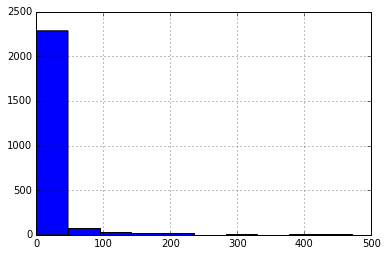

In [100]:
inbound_dinky["scheduled_wait_time"].hist()

In [101]:
inbound_dinky["scheduled_wait_time"].describe()

count    2450.000000
mean       22.002449
std        46.247492
min         0.000000
25%         5.000000
50%        11.000000
75%        21.000000
max       471.000000
Name: scheduled_wait_time, dtype: float64

In [102]:
inbound_dinky["scheduled_wait_time"].quantile(.8)

25.0

In [103]:
inbound_dinky["scheduled_wait_time"].quantile(.83), inbound_dinky["scheduled_wait_time"].quantile(.84)

(27.669999999999845, 31.000000000000004)

In [104]:
inbound_dinky["scheduled_wait_time"].quantile(.9)

36.09999999999991

In [105]:
inbound_dinky["scheduled_wait_time"].quantile(.95)

60.0

In [146]:
inbound_dinky["scheduled_wait_time"].sort_values(ascending=False)[100:125]

8718    94.0
4653    67.0
2155    67.0
1915    67.0
6567    67.0
8826    67.0
4415    67.0
6327    67.0
4177    67.0
8586    67.0
8828    63.0
6569    63.0
6329    63.0
4179    63.0
8588    63.0
1917    63.0
2157    63.0
4417    63.0
4655    63.0
5969    60.0
5602    60.0
3080    60.0
470     60.0
4616    60.0
6292    60.0
Name: scheduled_wait_time, dtype: float64

#### Filtered late

In [106]:
len(inbound_dinky)

2450

In [107]:
len(inbound_dinky[inbound_dinky["scheduled_wait_time"] < 30])

2052

In [108]:
len(inbound_dinky[inbound_dinky["scheduled_wait_time"] < 5])

338

In [109]:
(inbound_dinky[inbound_dinky["scheduled_wait_time"] < 3].groupby("from_trenton")["late"].sum() / 
 inbound_dinky[inbound_dinky["scheduled_wait_time"] < 3].groupby("from_trenton").size())

from_trenton
True    0.746988
dtype: float64

In [110]:
len(inbound_dinky[(inbound_dinky["scheduled_wait_time"] > 5) & (inbound_dinky["scheduled_wait_time"] < 10)])

274

In [111]:
(inbound_dinky[(inbound_dinky["scheduled_wait_time"] > 5) & (inbound_dinky["scheduled_wait_time"] < 10)].groupby("from_trenton")["late"].sum() / 
 inbound_dinky[(inbound_dinky["scheduled_wait_time"] > 5) & (inbound_dinky["scheduled_wait_time"] < 10)].groupby("from_trenton").size())

from_trenton
False    0.101449
True     0.268657
dtype: float64

In [112]:
(inbound_dinky[inbound_dinky["scheduled_wait_time"] < 15].groupby("from_trenton")["late"].sum() / 
 inbound_dinky[inbound_dinky["scheduled_wait_time"] < 15].groupby("from_trenton").size())

from_trenton
False    0.145652
True     0.379562
dtype: float64

In [113]:
(inbound_dinky[inbound_dinky["scheduled_wait_time"] < 20].groupby("from_trenton")["late"].sum() / 
 inbound_dinky[inbound_dinky["scheduled_wait_time"] < 20].groupby("from_trenton").size())

from_trenton
False    0.139512
True     0.295736
dtype: float64

In [114]:
(inbound_dinky[inbound_dinky["scheduled_wait_time"] < 25].groupby("from_trenton")["late"].sum() / 
 inbound_dinky[inbound_dinky["scheduled_wait_time"] < 25].groupby("from_trenton").size())

from_trenton
False    0.133396
True     0.245198
dtype: float64

In [115]:
(inbound_dinky[inbound_dinky["scheduled_wait_time"] < 30].groupby("from_trenton")["late"].sum() / 
 inbound_dinky[inbound_dinky["scheduled_wait_time"] < 30].groupby("from_trenton").size())

from_trenton
False    0.131193
True     0.226611
dtype: float64

In [116]:
(inbound_dinky[inbound_dinky["scheduled_wait_time"] >= 30].groupby("from_trenton")["late"].sum() / 
 inbound_dinky[inbound_dinky["scheduled_wait_time"] >= 30].groupby("from_trenton").size())

from_trenton
False    0.006711
True     0.004016
dtype: float64

If you miss the first Dinky, how long would you have to wait for the next one [RESOLVED: using schedule for dinky]

Buffer time x % chance miss, range(30)

#### Loop and get % late by buffer

In [156]:
(inbound_dinky[inbound_dinky["scheduled_wait_time"] >= 30].groupby("from_trenton")["late"].sum() / 
 inbound_dinky[inbound_dinky["scheduled_wait_time"] >= 30].groupby("from_trenton").size())[0]

0.006711409395973154

In [181]:
from_south_late_chance = []

for i in range(60):
    under_wait = inbound_dinky_from_south[inbound_dinky_from_south["scheduled_wait_time"] <= i]
    chance = under_wait["late"].sum() / len(under_wait)
    from_south_late_chance.append(chance)

In [175]:
from_south_late_chance

[(0, 0.7941176470588235),
 (1, 0.7941176470588235),
 (2, 0.8571428571428571),
 (3, 0.5532646048109966),
 (4, 0.5532646048109966),
 (5, 0.5331412103746398),
 (6, 0.528),
 (7, 0.5292553191489362),
 (8, 0.5292553191489362),
 (9, 0.49033816425120774),
 (10, 0.4700460829493088),
 (11, 0.4385593220338983),
 (12, 0.3931947069943289),
 (13, 0.3795620437956204),
 (14, 0.3795620437956204),
 (15, 0.35714285714285715),
 (16, 0.35714285714285715),
 (17, 0.3271317829457364),
 (18, 0.3150074294205052),
 (19, 0.29573590096286106),
 (20, 0.2795838751625488),
 (21, 0.2679012345679012),
 (22, 0.25894988066825775),
 (23, 0.24519774011299436),
 (24, 0.24519774011299436),
 (25, 0.24004424778761063),
 (26, 0.24004424778761063),
 (27, 0.23117709437963946),
 (28, 0.22661122661122662),
 (29, 0.22661122661122662),
 (30, 0.22661122661122662),
 (31, 0.22661122661122662),
 (32, 0.22661122661122662),
 (33, 0.218),
 (34, 0.21605550049554015),
 (35, 0.21414538310412573),
 (36, 0.20877025738798857),
 (37, 0.20429104477

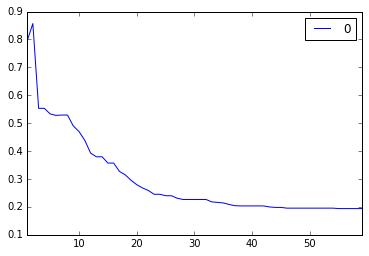

In [193]:
pd.DataFrame(from_south_late_chance)[1:].plot()

In [196]:
from_north_late_chance = []

for i in range(0, 60):
    under_wait = inbound_dinky_from_north[inbound_dinky_from_north["scheduled_wait_time"] <= i]
    chance = under_wait["late"].sum() / len(under_wait)
    from_north_late_chance.append(chance)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [197]:
from_north_late_chance

[nan,
 nan,
 nan,
 0.3684210526315789,
 0.3684210526315789,
 0.18446601941747573,
 0.18274111675126903,
 0.16691729323308271,
 0.16691729323308271,
 0.16066481994459833,
 0.16154873164218958,
 0.15272727272727274,
 0.14965986394557823,
 0.14965986394557823,
 0.14565217391304347,
 0.14084507042253522,
 0.14084507042253522,
 0.14084507042253522,
 0.13880742913000976,
 0.13951219512195123,
 0.1368421052631579,
 0.1333955223880597,
 0.1333955223880597,
 0.1333955223880597,
 0.1333955223880597,
 0.1333955223880597,
 0.1333955223880597,
 0.13119266055045872,
 0.13119266055045872,
 0.13119266055045872,
 0.13119266055045872,
 0.13119266055045872,
 0.13011828935395814,
 0.13011828935395814,
 0.13011828935395814,
 0.1265377855887522,
 0.1245674740484429,
 0.1245674740484429,
 0.1245674740484429,
 0.12360515021459227,
 0.12360515021459227,
 0.12360515021459227,
 0.12360515021459227,
 0.12360515021459227,
 0.12360515021459227,
 0.12360515021459227,
 0.12360515021459227,
 0.12360515021459227,
 0.12

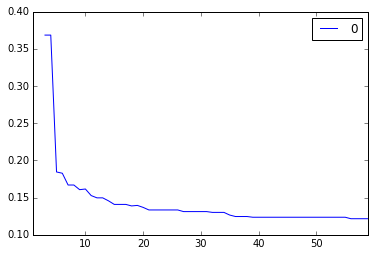

In [194]:
pd.DataFrame(from_north_late_chance)[1:].plot()

### Actual

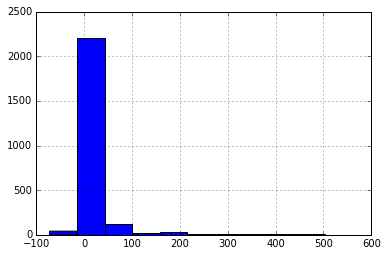

In [117]:
inbound_dinky["actual_wait_time"].hist()

In [118]:
inbound_dinky["actual_wait_time"].describe()

count    2450.000000
mean       19.313748
std        47.427383
min       -72.633333
25%         2.137500
50%         8.925000
75%        18.829167
max       504.083333
Name: actual_wait_time, dtype: float64

## By time of day/weekday

### Weekday

In [119]:
inbound_dinky["weekday"] = inbound_dinky["expected"].dt.weekday

In [120]:
inbound_dinky.groupby("weekday")["late"].sum() / inbound_dinky.groupby("weekday").size()

weekday
0    0.146006
1    0.107232
2    0.110553
3    0.130326
4    0.182957
5    0.208835
6    0.190871
dtype: float64

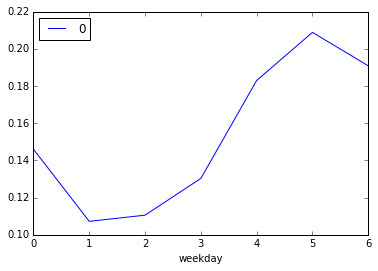

In [121]:
pd.DataFrame(inbound_dinky.groupby("weekday")["late"].sum() / inbound_dinky.groupby("weekday").size()).plot()

### Hour

In [122]:
inbound_dinky["hour"] = inbound_dinky["expected"].dt.hour

In [123]:
pd.DataFrame(inbound_dinky.groupby("hour")["late"].sum() / inbound_dinky.groupby("hour").size())

,0
hour,
0,0.135135
1,0.194444
2,0.000000
4,0.000000
5,0.232558
6,0.141791
7,0.068750
8,0.040650
9,0.081250


In [124]:
inbound_dinky.groupby("hour").size()

hour
0      37
1      36
2      15
4      38
5      86
6     134
7     160
8     123
9     160
10    141
11     84
12    103
13    123
14     75
15    131
16    131
17    169
18    207
19    104
20    141
21    103
22     84
23     65
dtype: int64

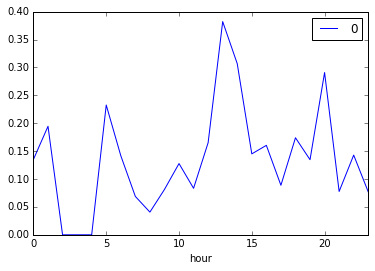

In [125]:
pd.DataFrame(inbound_dinky.groupby("hour")["late"].sum() / inbound_dinky.groupby("hour").size()).plot()

### Hour/Weekday

In [126]:
hour_by_weekday_late = pd.DataFrame(inbound_dinky.groupby(["weekday", "hour"])["late"].sum() / inbound_dinky.groupby(["weekday", "hour"]).size())

In [127]:
hour_by_weekday_late.rename(columns={0:"late"}, inplace=True)

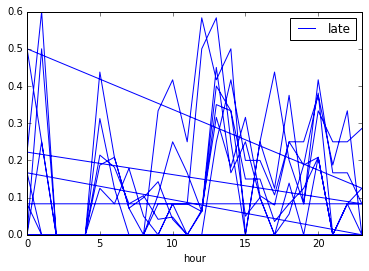

In [128]:
hour_by_weekday_late.reset_index("hour").plot(x = "hour", y = "late")
# uhh

In [129]:
hour_by_weekday_late.reset_index(inplace=True)

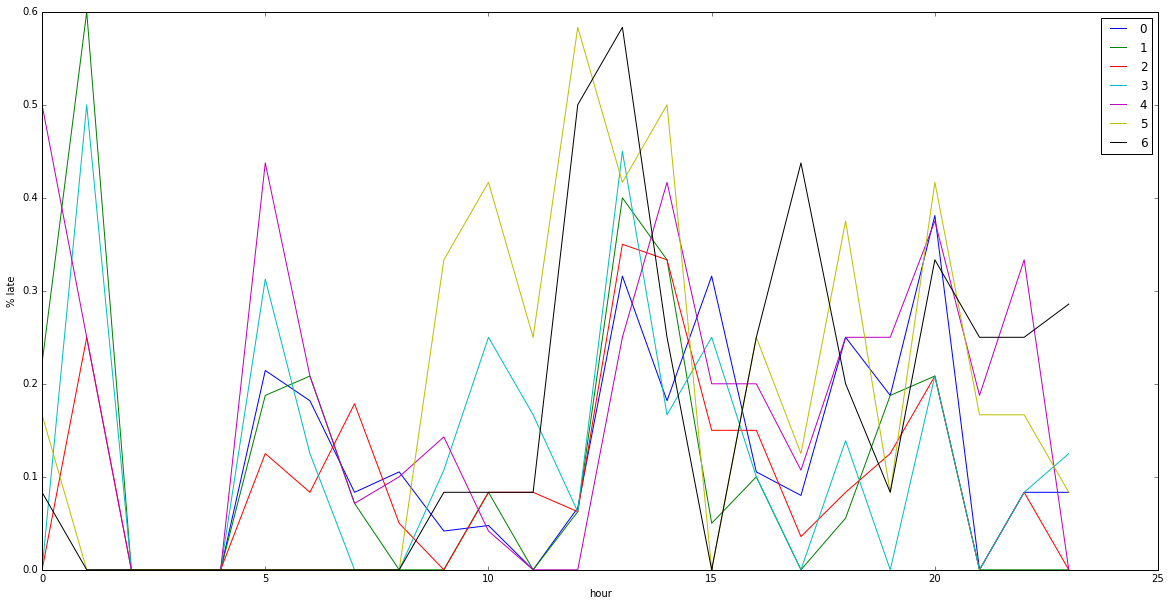

In [130]:
# fine

import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20, 10))

for day in range(7):
    df = hour_by_weekday_late[hour_by_weekday_late["weekday"]==day]
    ax.plot(df["hour"],df["late"],label=day)

ax.set_xlabel("hour")
ax.set_ylabel("% late")
ax.legend(loc='best')

TimeGrouper?

### Weekend vs. Weekday

In [131]:
inbound_dinky["is_weekday"] = inbound_dinky["weekday"] < 5

In [132]:
hour_by_weekday_type_late = pd.DataFrame(inbound_dinky.groupby(["is_weekday", "hour"])["late"].sum() / inbound_dinky.groupby(["is_weekday", "hour"]).size())

In [133]:
hour_by_weekday_type_late.rename(columns={0:"late"}, inplace=True)

In [134]:
hour_by_weekday_type_late.reset_index(inplace=True)

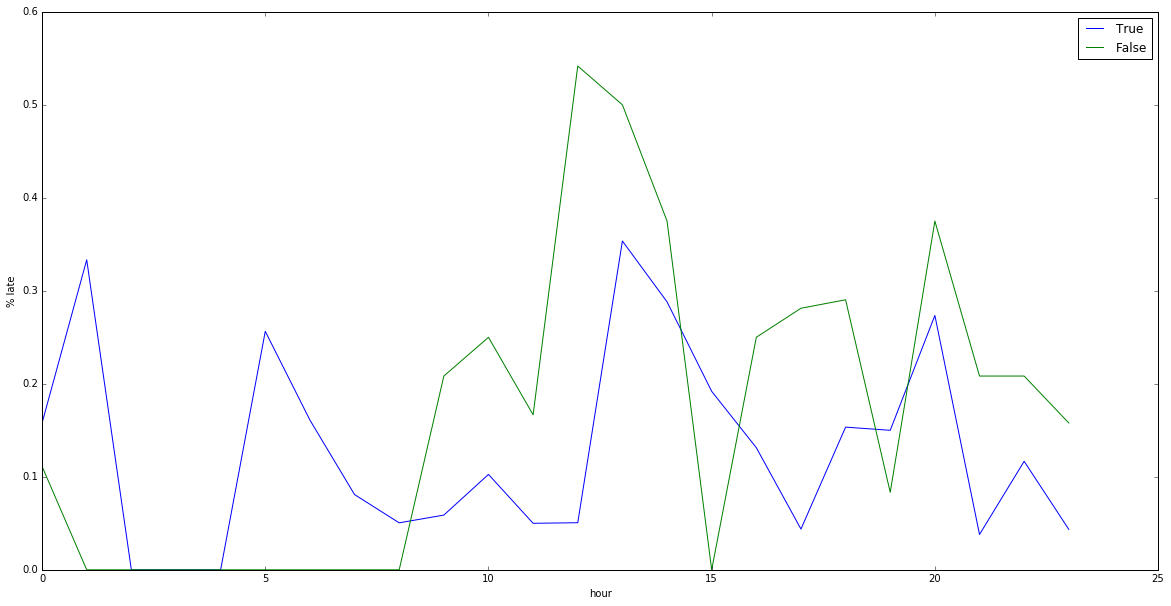

In [135]:
# fine

import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20, 10))

for day in [True, False]:
    df = hour_by_weekday_type_late[hour_by_weekday_type_late["is_weekday"]==day]
    ax.plot(df["hour"],df["late"],label=day)

ax.set_xlabel("hour")
ax.set_ylabel("% late")
ax.legend(loc='best')

In [136]:
dinky.groupby(dinky["date"]).size()

date
2018-02-05    164
2018-02-06    152
2018-02-07    164
2018-02-08    152
2018-02-09    164
2018-02-10    116
2018-02-11    108
2018-02-12    164
2018-02-13    152
2018-02-14    164
2018-02-15    152
2018-02-16    164
2018-02-17    116
2018-02-18    108
2018-02-19    116
2018-02-20    164
2018-02-21    152
2018-02-22    164
2018-02-23    152
2018-02-24    116
2018-02-25    108
2018-02-26    164
2018-02-27    152
2018-02-28    164
2018-03-01    152
2018-03-02    164
2018-03-03    116
2018-03-04    108
dtype: int64

In [137]:
dinky.groupby(dinky["date"].dt.weekday).size() / 4

date
0    152.0
1    155.0
2    161.0
3    155.0
4    161.0
5    116.0
6    108.0
dtype: float64

In [138]:
dinky_by_day = pd.DataFrame(dinky.groupby(dinky["date"]).size()).reset_index()

In [139]:
dinky_by_day.groupby(dinky_by_day["date"].dt.weekday).max() - dinky_by_day.groupby(dinky_by_day["date"].dt.weekday).min()

,date,0
date,,
0,21 days,48
1,21 days,12
2,21 days,12
3,21 days,12
4,21 days,12
5,21 days,0
6,21 days,0


# Seaborn plots

In [199]:
import seaborn as sns

Colors:
* Orange: 241,100,18 (F16412)
* Purple: 175,22,148 (AF1694)
* Blue: 41,61,147 (293D93)

## Overall late % (bar graph)

In [224]:
overall_late = pd.DataFrame(inbound_dinky.groupby("from_trenton")["late_to_junction"].sum() / inbound_dinky.groupby("from_trenton").size())

In [225]:
overall_late

,0
from_trenton,
False,0.347054
True,0.536746


In [226]:
overall_late.reset_index(inplace=True)
overall_late = overall_late.replace(True, "Northbound (from Trenton)").replace(False, "Southbound (from NYC)")

In [228]:
overall_late.columns = ["Direction", "% Late"]

In [230]:
overall_late["% Late"] = overall_late["% Late"] * 100

In [231]:
overall_late

,Direction,% Late
0,Southbound (from NYC),34.705408
1,Northbound (from Trenton),53.674649


(0, 100)

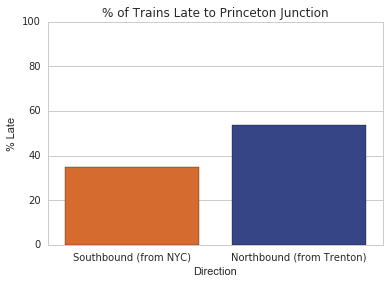

In [549]:
sns.set_style(style="whitegrid")
plot = sns.barplot(data = overall_late, x = "Direction", y ="% Late", palette = ["#F16412", "#293D93"]).set_title("% of Trains Late to Princeton Junction")
plt.ylim(0, 100)

In [550]:
plot.figure.savefig("../../plots/overall_late.png")

## Overall miss dinky late %

In [647]:
overall_miss_dinky = pd.DataFrame(inbound_dinky.groupby("from_trenton")["late"].sum() / inbound_dinky.groupby("from_trenton").size())

In [648]:
overall_miss_dinky

,0
from_trenton,
False,0.116223
True,0.180842


In [649]:
overall_miss_dinky.reset_index(inplace=True)
overall_miss_dinky = overall_miss_dinky.replace(True, "Northbound (from Trenton)").replace(False, "Southbound (from NYC)")

In [650]:
overall_miss_dinky.columns = ["Direction", "% Chance of missing Dinky"]

In [654]:
overall_miss_dinky["% Chance of missing Dinky"] = overall_miss_dinky["% Chance of missing Dinky"] * 100

In [655]:
overall_miss_dinky

,Direction,% Chance of missing Dinky,% Chance of Missing Dinky
0,Southbound (from NYC),11.622276,11.622276
1,Northbound (from Trenton),18.084228,18.084228


(0, 100)

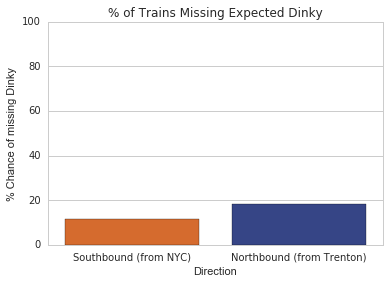

In [656]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.set_style(style="whitegrid")

plot = sns.barplot(data = overall_miss_dinky, x = "Direction", y ="% Chance of missing Dinky", palette = ["#F16412", "#293D93"]).set_title("% of Trains Missing Expected Dinky")
plt.ylim(0, 100)

In [657]:
plot.figure.savefig("../../plots/overall_miss_dinky.png")

## Buffer x % late

In [ ]:
from numpy import arange

### From south

In [275]:
from_south_late_chance = [x*100 for x in from_south_late_chance]

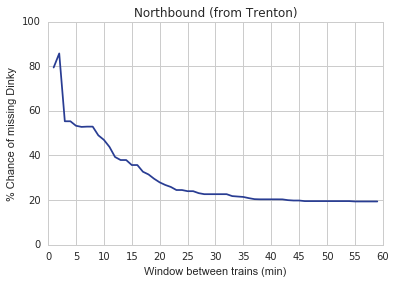

In [556]:
plt.plot(pd.DataFrame(from_south_late_chance)[1:], color = "#293D93")
plt.title("Northbound (from Trenton)")
plt.xlabel("Window between trains (min)")
plt.ylabel("% Chance of missing Dinky")
plt.ylim(0, 100)
plt.xticks(arange(0, 60+1, 5))
plt.savefig("../../plots/northbound_buffer_late.png")

## From north

In [289]:
from_north_late_chance = [x*100 for x in from_north_late_chance]

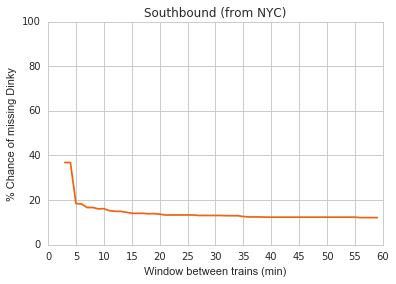

In [557]:
plt.plot(pd.DataFrame(from_north_late_chance)[1:], color = "#F16412")
plt.title("Southbound (from NYC)")
plt.xlabel("Window between trains (min)")
plt.ylabel("% Chance of missing Dinky")
plt.ylim(0, 100)
plt.xticks(arange(0, 60+1, 5))
plt.savefig("../../plots/southbound_buffer_late.png")

### Facet

In [595]:
from_north_late_chance_df = pd.DataFrame(from_north_late_chance)[1:].reset_index()

In [596]:
from_north_late_chance_df["Direction"] = "Southbound (from NYC)"

In [597]:
from_south_late_chance_df = pd.DataFrame(from_south_late_chance)[1:].reset_index()

In [598]:
from_south_late_chance_df["Direction"] = "Northbound (from Trenton)"

In [599]:
facet_late_chance = from_south_late_chance_df.append(from_north_late_chance_df)

In [600]:
facet_late_chance.columns = ["Window between trains (min)", "% Chance of missing Dinky", "Direction"]

In [601]:
facet_late_chance.head()

,Window between trains (min),% Chance of missing Dinky,Direction
0,1,79.411765,Northbound (from Trenton)
1,2,85.714286,Northbound (from Trenton)
2,3,55.326460,Northbound (from Trenton)
3,4,55.326460,Northbound (from Trenton)
4,5,53.314121,Northbound (from Trenton)


(0, 100)

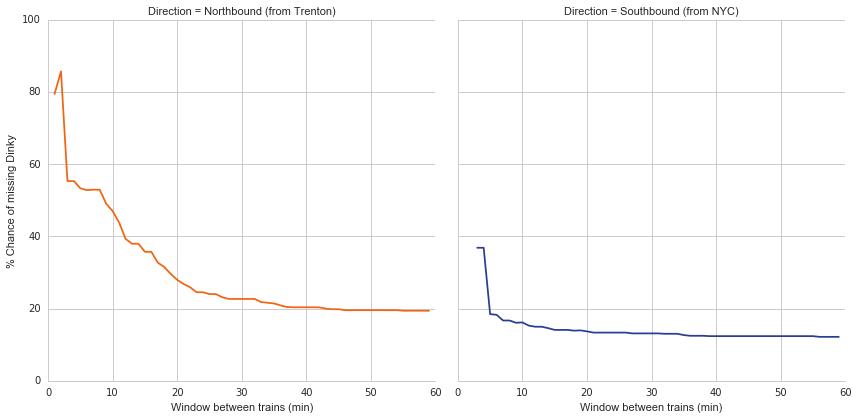

In [607]:
sns.set(rc={"figure.figsize":(14, 10)})
sns.set_style("whitegrid")

g = sns.FacetGrid(facet_late_chance, col = "Direction", size = 6, hue = "Direction", palette = ["#F16412", "#293D93"])
g.map(plt.plot, "Window between trains (min)", "% Chance of missing Dinky")
plt.ylim(0, 100)

In [609]:
g.savefig("../../plots/facet_buffer_late.png")

## By weekday

In [327]:
import calendar

In [328]:
weekday_dict = dict(enumerate(calendar.day_name))

### Facet

In [610]:
by_weekday = pd.DataFrame(inbound_dinky.groupby(["from_trenton", "weekday"])["late"].sum() / inbound_dinky.groupby(["from_trenton", "weekday"]).size())

In [611]:
by_weekday.reset_index(inplace=True)

In [612]:
by_weekday.columns = ["Direction", "Weekday", "% Chance of missing Dinky"]

In [613]:
by_weekday

,Direction,Weekday,% Chance of missing Dinky
0,False,0,0.087912
1,False,1,0.072115
2,False,2,0.069307
3,False,3,0.082524
4,False,4,0.155000
5,False,5,0.243902
6,False,6,0.177966
7,True,0,0.204420
8,True,1,0.145078
9,True,2,0.153061


In [614]:
by_weekday["Weekday"] = by_weekday["Weekday"].map(weekday_dict)

In [615]:
by_weekday = by_weekday.replace(True, "Northbound (from Trenton)").replace(False, "Southbound (from NYC)")

In [616]:
by_weekday["% Chance of missing Dinky"] = by_weekday["% Chance of missing Dinky"] * 100

In [617]:
by_weekday

,Direction,Weekday,% Chance of missing Dinky
0,Southbound (from NYC),Monday,8.791209
1,Southbound (from NYC),Tuesday,7.211538
2,Southbound (from NYC),Wednesday,6.930693
3,Southbound (from NYC),Thursday,8.252427
4,Southbound (from NYC),Friday,15.500000
5,Southbound (from NYC),Saturday,24.390244
6,Southbound (from NYC),Sunday,17.796610
7,Northbound (from Trenton),Monday,20.441989
8,Northbound (from Trenton),Tuesday,14.507772
9,Northbound (from Trenton),Wednesday,15.306122


In [618]:
weekday_colors = ["#AA3898", "#BBCBE1", "#FFCF06", "#0DAF5B", "#FAA635", "#EE3A43", "#1AADE7"]

In [619]:
# sns.set(rc={"figure.figsize":(7, 5)})
# sns.set_style("whitegrid")
# plot = (sns.barplot(data = by_weekday, x = "Weekday", y ="% Late", palette = weekday_colors)
#            .set_title("% of Trains Missing Expected Dinky (2/5/18 - 3/4/18)"))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(0, 100)

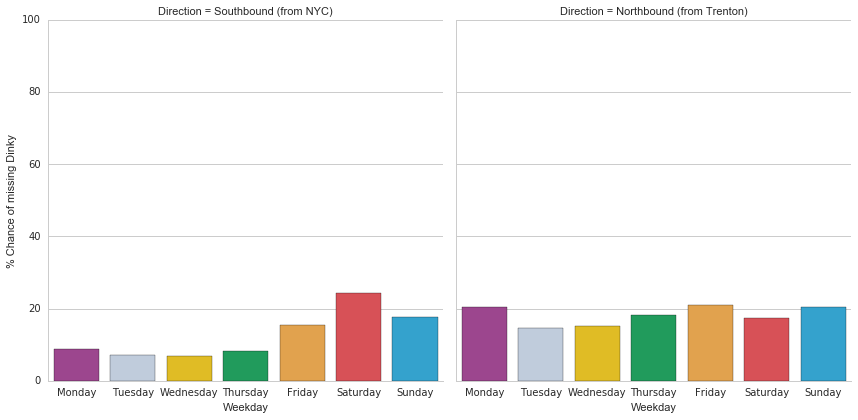

In [620]:
sns.set(rc={"figure.figsize":(14, 10)})
sns.set_style("whitegrid")

g = sns.FacetGrid(by_weekday, col = "Direction", size = 6)
g.map(sns.barplot, "Weekday", "% Chance of missing Dinky", palette = weekday_colors)
plt.ylim(0, 100)

In [621]:
g.savefig("../../plots/miss_by_weekday.png")

### Combined

In [378]:
by_weekday = pd.DataFrame(inbound_dinky.groupby("weekday")["late"].sum() / inbound_dinky.groupby("weekday").size())

In [379]:
by_weekday.reset_index(inplace=True)

In [380]:
by_weekday.columns = ["Weekday", "% Late"]

In [381]:
by_weekday["Weekday"] = by_weekday["Weekday"].map(weekday_dict)

In [382]:
by_weekday["% Late"] = by_weekday["% Late"] * 100

In [383]:
weekday_colors = ["#AA3898", "#BBCBE1", "#FFCF06", "#0DAF5B", "#FAA635", "#EE3A43", "#1AADE7"]

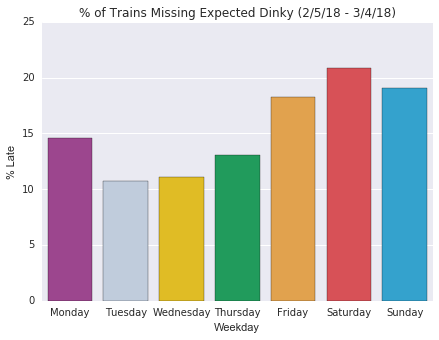

In [384]:
sns.set(rc={"figure.figsize":(7, 5)})
plot = (sns.barplot(data = by_weekday, x = "Weekday", y ="% Late", palette = weekday_colors)
           .set_title("% of Trains Missing Expected Dinky (2/5/18 - 3/4/18)"))

## By hour of day

In [638]:
by_hour = pd.DataFrame(inbound_dinky.groupby(["from_trenton", "hour"])["late"].sum() / inbound_dinky.groupby(["from_trenton", "hour"]).size())

In [639]:
by_hour.reset_index(inplace=True)

In [640]:
by_hour.columns = ["Direction", "Hour", "% Chance of missing Dinky"]

In [641]:
by_hour["% Chance of missing Dinky"] = by_hour["% Chance of missing Dinky"] * 100

In [642]:
by_hour["Direction"].replace(True, "Northbound (from Trenton)", inplace=True)
by_hour["Direction"].replace(False, "Southbound (from NYC)", inplace = True)

In [643]:
by_hour.head()

,Direction,Hour,% Chance of missing Dinky
0,Southbound (from NYC),0,19.047619
1,Southbound (from NYC),1,33.333333
2,Southbound (from NYC),2,0.000000
3,Southbound (from NYC),5,0.000000
4,Southbound (from NYC),6,2.127660


In [644]:
by_hour["color"] = "#F16412"
by_hour.loc[by_hour["Direction"] == "Northbound (from Trenton)", "color"] = "#293D93"

In [645]:
# ["#F16412", "#293D93"]

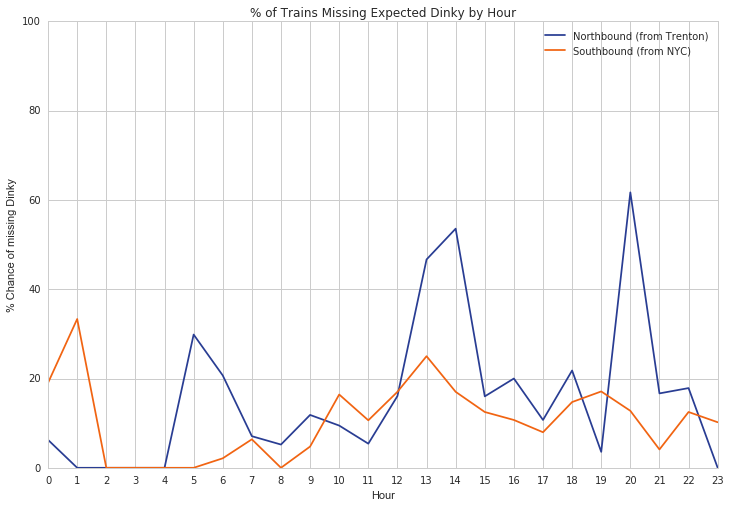

In [646]:
fig, ax = plt.subplots(figsize = (12, 8))

for key, grp in by_hour.groupby("Direction"):
    ax = grp.plot(ax=ax, kind="line", x="Hour", y="% Chance of missing Dinky", c=list(grp["color"])[0], label=key) # dumb way to do color
    ax.color = grp.color
    
plt.xticks(arange(0, 24, 1))
plt.ylabel("% Chance of missing Dinky")
plt.ylim(0, 100)
plt.title("% of Trains Missing Expected Dinky by Hour")
plt.legend()
plt.savefig("../../plots/miss_by_hour.png")

Too messy... doesn't add very much

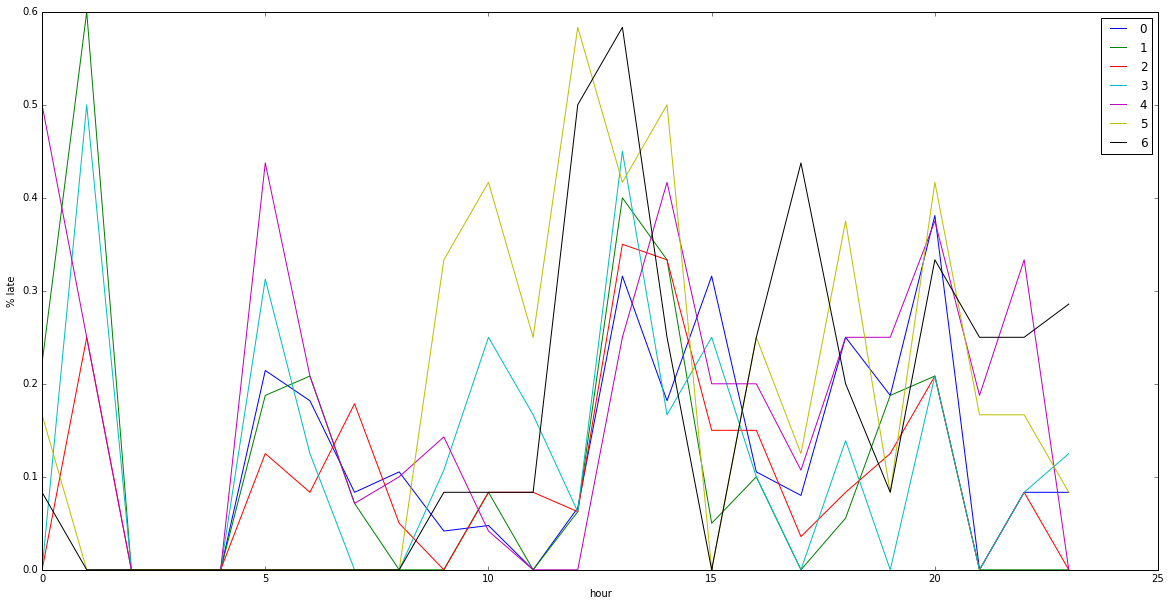

In [208]:
# fine

import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20, 10))

for day in range(7):
    df = hour_by_weekday_late[hour_by_weekday_late["weekday"]==day]
    ax.plot(df["hour"],df["late"],label=day)

ax.set_xlabel("hour")
ax.set_ylabel("% late")
ax.legend(loc='best')
plt.ylim(0, 100)